In [1]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [2]:
#Reading the dataset
data = pd.read_csv('C:/Trinity/Comp Sc/ML/Datasets/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index

In [3]:
#Creating a copy of the data
bank_data = data.copy()

In [4]:
bank_data_2 = bank_data.copy()

In [5]:
#Dropping rows with column > 25
bank_data_2 = bank_data_2.drop(bank_data_2[bank_data_2.campaign>25].index)

In [8]:
#Subsetting only the bank client data
bank_client_data=bank_data_2[['age','job','marital','education','default','housing','loan']].copy()

In [10]:
bank_client_data_2 = bank_client_data.copy()

In [11]:
label_mapping = {}
bank_client_data_2['job'], label_mapping['job'] = pd.factorize(bank_client_data_2['job'])
bank_client_data_2['marital'], label_mapping['marital'] = pd.factorize(bank_client_data_2['marital'])
bank_client_data_2['education'], label_mapping['education'] = pd.factorize(bank_client_data_2['education'])
bank_client_data_2['default'], label_mapping['default'] = pd.factorize(bank_client_data_2['default'])
bank_client_data_2['housing'], label_mapping['housing'] = pd.factorize(bank_client_data_2['housing'])
bank_client_data_2['loan'], label_mapping['loan'] = pd.factorize(bank_client_data_2['loan'])
print('label_mapping is  : ',label_mapping)

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


In [14]:
#Starting with imputation of 'Education'
bank_client_data_loan=bank_client_data_2.copy()

In [15]:
np.unique(bank_client_data_loan.loan)

array([0, 1, 2], dtype=int64)

In [16]:
len(bank_client_data_loan[bank_client_data_loan['loan']==2])

989

In [18]:
y = bank_client_data_loan['loan']
ytest=y[y==2]
Xtest=(bank_client_data_loan[bank_client_data_loan['loan']==2]).drop('loan', axis=1)

In [19]:
train = (bank_client_data_loan[-(bank_client_data_loan['loan']==2)])

In [20]:
Xtrain_d1=train.drop('loan', axis=1)
ytrain_d1=train.loan

In [21]:
Xtrain_d2 = train.copy()
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.marital==3].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.job==9].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.default==1].index)

ytrain_d2 = Xtrain_d2.loan
Xtrain_d2 = Xtrain_d2.drop('loan', axis=1)


In [27]:
Xtrain_d3 = train.copy()
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.job==9].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.marital==3].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.default==1].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.housing==2].index)
#Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.loan==2].index)

ytrain_d3 = Xtrain_d3.loan
Xtrain_d3 = Xtrain_d3.drop('loan', axis=1)
               

<BarContainer object of 6 artists>

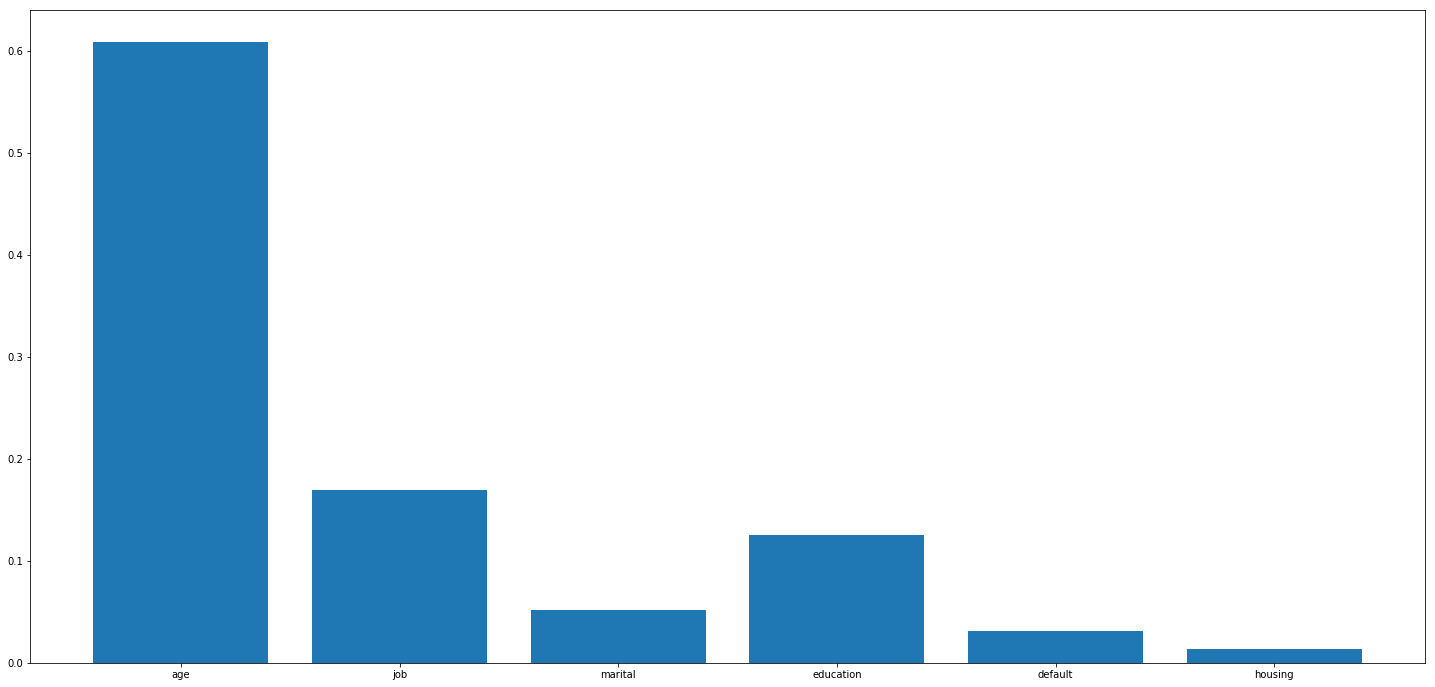

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#Using Xtrain_d1 and ytrain_d1 
clf_d1 = RandomForestClassifier()
clf_d1.fit(Xtrain_d1, ytrain_d1)
clf_d1.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d1.columns,clf_d1.feature_importances_)

<BarContainer object of 6 artists>

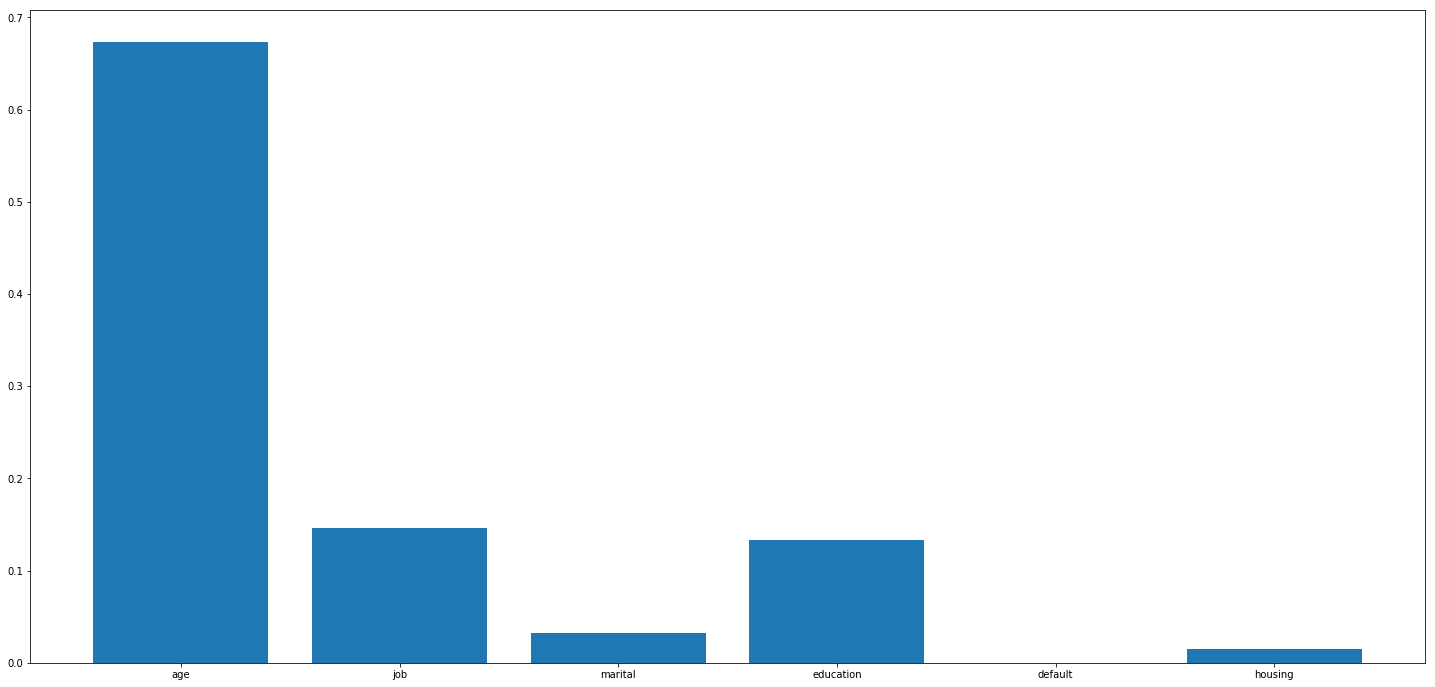

In [24]:
#Using Xtrain_d2 and ytrain_d2 
clf_d2 = RandomForestClassifier()
clf_d2.fit(Xtrain_d2, ytrain_d2)
clf_d2.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d2.columns,clf_d2.feature_importances_)

<BarContainer object of 6 artists>

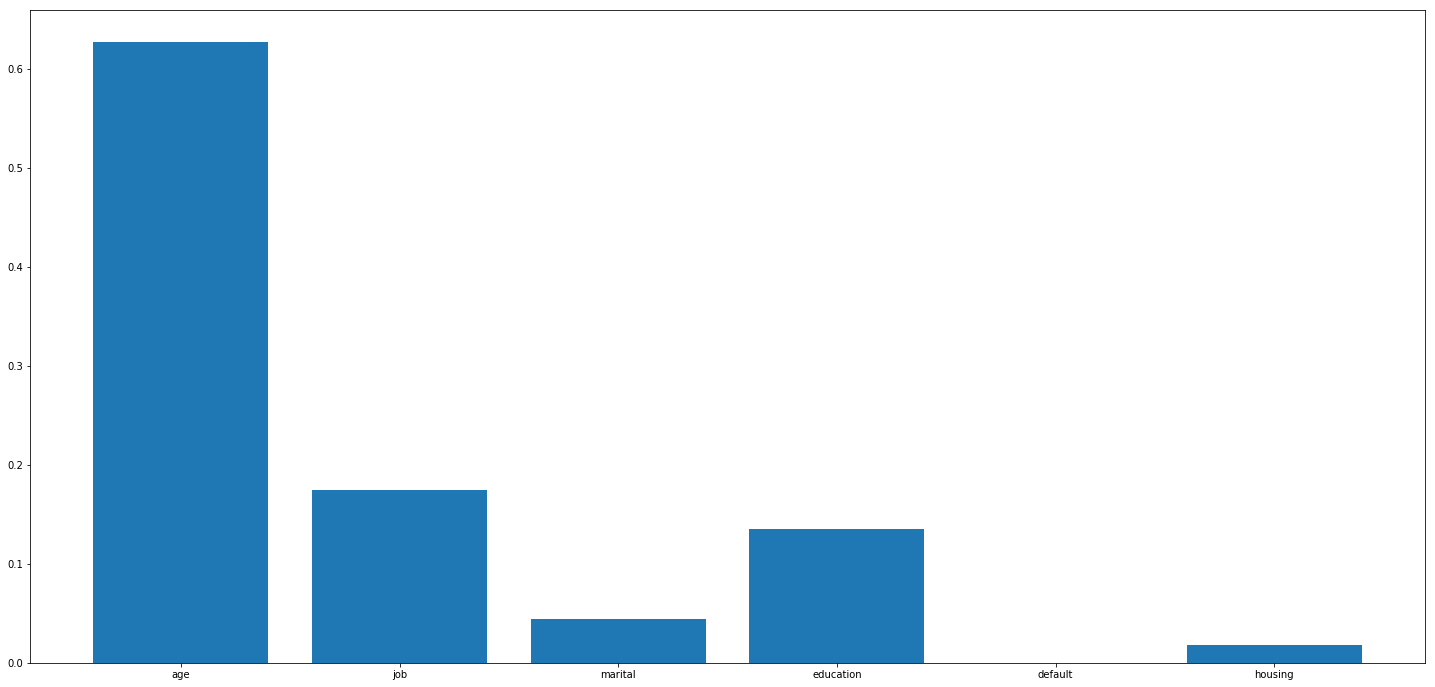

In [28]:
#Using Xtrain_d3 and ytrain_d3 
clf_d3 = RandomForestClassifier()
clf_d3.fit(Xtrain_d3, ytrain_d3)
clf_d3.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d3.columns,clf_d3.feature_importances_)

In [33]:
pd.value_counts(bank_client_data_loan.loan)

0    33883
1     6239
2      989
Name: loan, dtype: int64

In [34]:
pred_loan_d1 = clf_d1.predict((Xtest))
pred_loan_d2 = clf_d2.predict((Xtest))
pred_loan_d3 = clf_d3.predict((Xtest))


In [35]:
pred_loan_d1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
pred_loan_d2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
pred_loan_d3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
c=['age','job','marital','education']


In [39]:
#c
Xtrain_d1_c = Xtrain_d1[c]
Xtrain_d2_c = Xtrain_d2[c]
Xtrain_d3_c = Xtrain_d3[c]


In [40]:
#c
#Using Xtrain_d1_c and ytrain_d1 
clf_d1_c = RandomForestClassifier()
clf_d1_c.fit(Xtrain_d1_c, ytrain_d1)

#Using Xtrain_d2_c and ytrain_d2 
clf_d2_c = RandomForestClassifier()
clf_d2_c.fit(Xtrain_d2_c, ytrain_d2)

#Using Xtrain_d3_c and ytrain_d3 
clf_d3_c = RandomForestClassifier()
clf_d3_c.fit(Xtrain_d3_c, ytrain_d3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
Xtest_c = Xtest[c]

In [43]:
pred_loan_d1_c = clf_d1_c.predict((Xtest_c))
pred_loan_d2_c = clf_d2_c.predict((Xtest_c))
#Considering
pred_loan_d3_c = clf_d3_c.predict((Xtest_c))

In [44]:
#Reading bank_data_3_job.csv
d1 = pd.read_csv('C:/Trinity/Comp Sc/ML/Imputation/Housing 4/bank_data_3_housing.csv',sep=',')

In [51]:
bank_data_3.loc[bank_data_3.job=='unknown','job']

Series([], Name: job, dtype: object)

In [46]:
bank_data_3 = d1.copy()

In [52]:
#------------------------------------ data imputation -----------------------------------------------------
#pred_loan_d3_c
bank_data_3.loc[bank_data_3.loan=='unknown','loan']=pred_loan_d3_c

In [53]:
bank_data_3.loc[bank_data_3.loan==0,'loan'] = 'no'
bank_data_3.loc[bank_data_3.loan==1,'loan'] = 'yes'
bank_data_3.loc[bank_data_3.loan==2,'loan'] = 'unknown'


In [54]:
bank_data_3.to_csv('bank_data_3_loan.csv')

In [60]:
bank_data_3.loc[bank_data_3.education=='unknown','education']

Series([], Name: education, dtype: object)